# **Heap**

A heap is a data structure that is an implementation of the priority queue.

Note that a priority queue is an abstract data structure. A heap is one of many ways to implement a priority queue. However, people often use the two terms interchangeably. In this course, we will use the term "heap".

A heap is a container that stores elements, and supports the following operations:

- Add an element in O(logn)
- Remove the minimum element in O(logn)
- Find the minimum element in O(1)

A heap can also find the max elements instead of the min elements. If a heap is configured to find/remove the min element, it's called a min heap. If it's configured to find/remove the max element, it's called a max heap.

**How is a heap implemented?**

Like a hash map, all major programming languages will have support for a heap, so you don't need to implement it yourself. In terms of solving algorithm problems, you only really care about the interface, not how it is implemented. But like with hash maps, it's still good to understand the implementation in case you are asked about it in an interview.

    For brevity, we'll talk about min heaps in this article, although the logic is the same for max heaps.

There are multiple ways to implement a heap, although the most popular way is called a binary heap using an array. In the trees and graphs chapter, we saw that binary trees are typically implemented with a Node object.

A binary heap implements a binary tree, but with only an array. The idea is that each element in the array is a node in the tree. The smallest element in the tree is the root, and the following property is maintained at every node: if A is the parent of B, then A.val <= B.val. Notice that this property directly implies that the root is the smallest element.

    Another constraint is that the tree must be a complete tree.

The parent-child relationships are done using math with the indices. The first element at index 0 is the root, then the elements at indices 1 and 2 are the root's children, the elements at indices 3 and 4 are the children of the element at index 1 and the elements at indices 5 and 6 are the children of the element at index 2, and so on. If a node is at index i, then its children are at indices 2i + 1 and 2i + 2. When elements are added or removed, operations are done to maintain the aforementioned property of parent.val <= child.val. The number of operations needed scales logarithmically with the number of elements in the heap, and the process is known as "bubbling up".

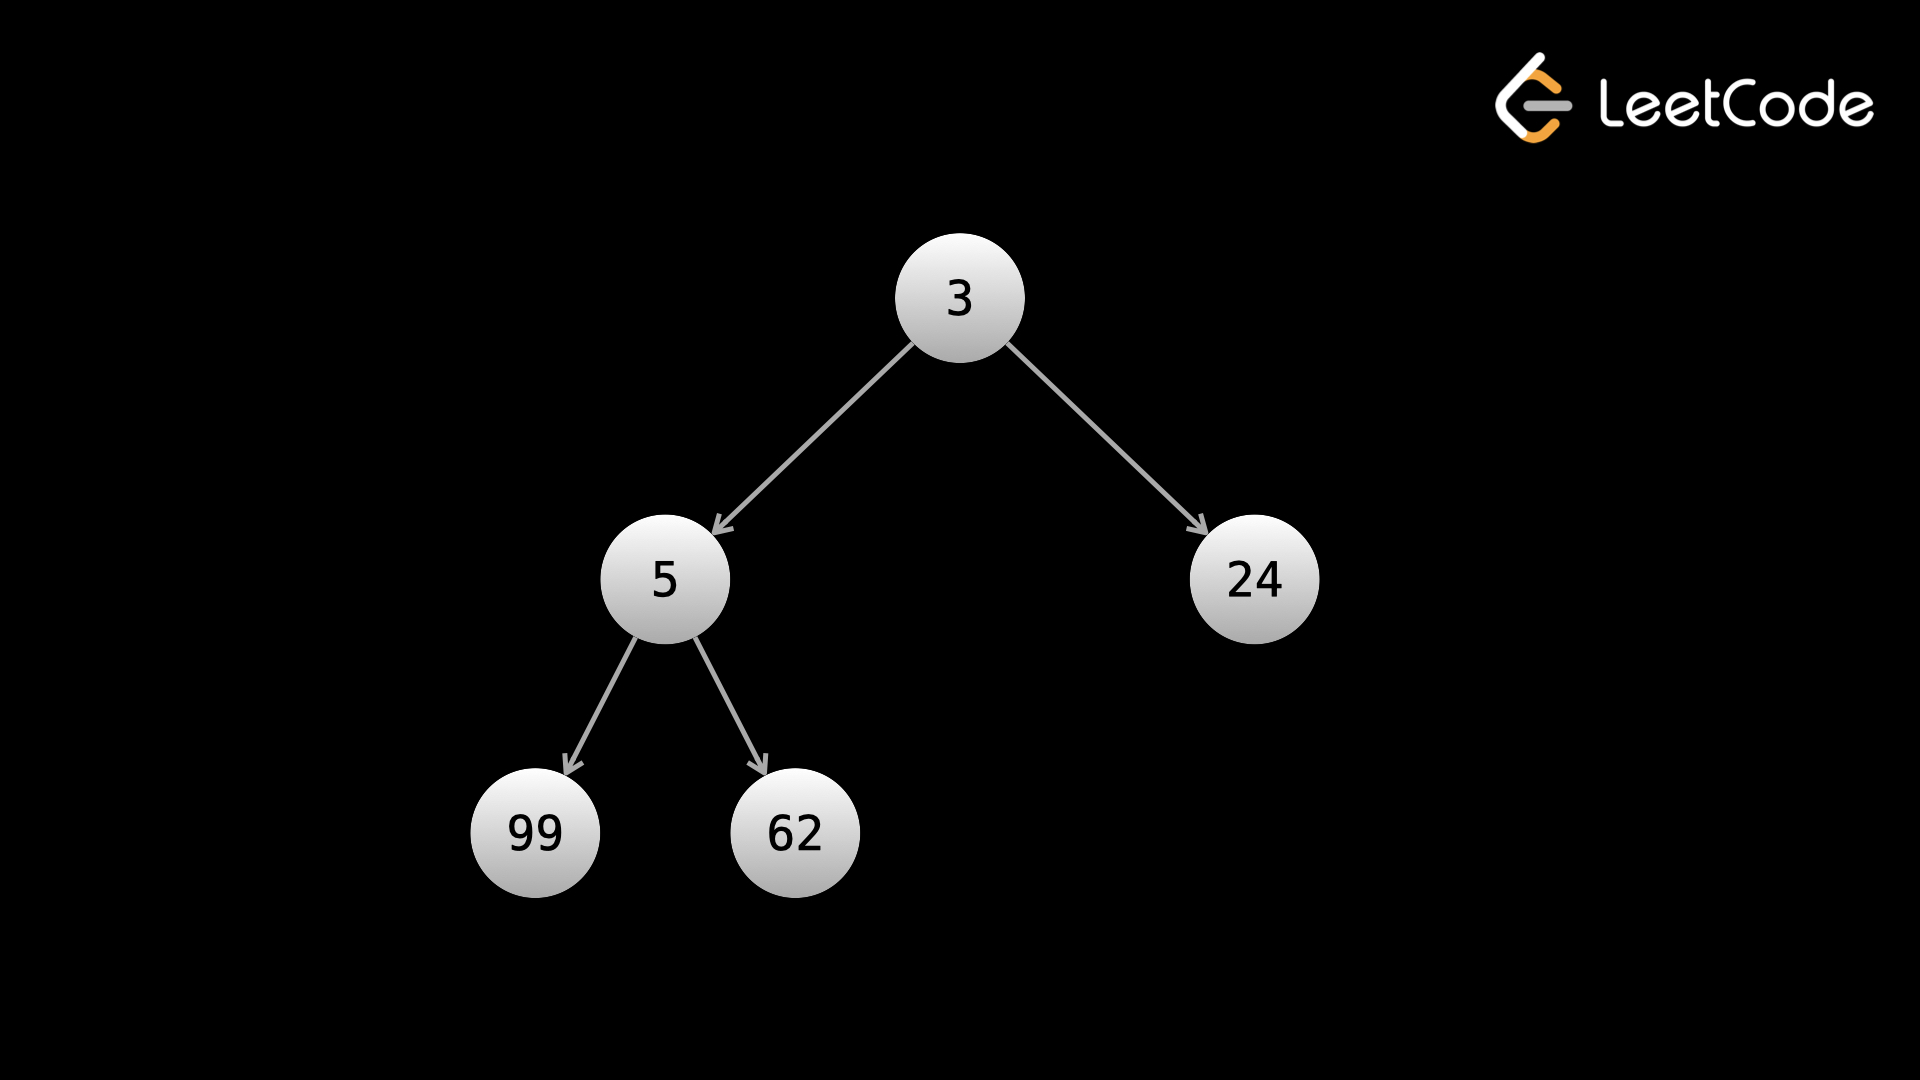

    An existing array of elements can also be converted into a heap in linear time, although the process is complicated. Luckily, some major programming languages have built-in methods to do this.

Remember: you shouldn't worry too much about how heaps are implemented. The important thing is that you understand the interface. We have included implementation details in this article for the sake of completeness.`

In many problems, using a heap can improve an algorithm's time complexity from O(n2) to O(n⋅logn), which is a massive improvement (for n = 1,000,000, this is 50,000 times faster). A heap is a great option whenever you need to find the maximum or minimum of something repeatedly.

**Interface guide**

Here's a quick runthrough of the interface for a heap in major languages:

In [1]:
# In Python, we will use the heapq module
# Note: heapq only implements min heaps
from heapq import *

# Declaration: heapq does not give you a heap data structure.
# You just use a normal list, and heapq provides you with
# methods that can be used on this list to perform heap operations
heap = []

# Add to heap
heappush(heap, 1)
heappush(heap, 2)
heappush(heap, 3)

# Check minimum element
heap[0] # 1

# Pop minimum element
heappop(heap) # 1

# Get size
len(heap) # 2

# Bonus: convert a list to a heap in linear time
nums = [43, 2, 13, 634, 120]
heapify(nums)

# Now, you can use heappush and heappop on nums
# and nums[0] will always be the minimum element

In [2]:
import heapq

# Note: Python's heapq implements a min heap

heap = [67, 341, 234, -67, 12, -976]
heapq.heapify(heap)

heapq.heappush(heap, 7451)
heapq.heappush(heap, -5352)

# The numbers will be printed in sorted order
while heap:
    print(heapq.heappop(heap))

-5352
-976
-67
12
67
234
341
7451


**Heap examples**

A heap is an amazing tool whenever you need to repeatedly find the maximum or minimum element. Let's look at some example problems.

Example 1: 1046. Last Stone Weight

You are given an array of integers stones where stones[i] is the weight of the ith  stone. On each turn, we choose the heaviest two stones and smash them together. Suppose the heaviest two stones have weights x and y with x <= y. If x == y, then both stones are destroyed. If x != y, then x is destroyed and y loses x weight. Return the weight of the last remaining stone, or 0 if there are no stones left.

In [ ]:
def lastStoneWeight_no_heap(stones):
    while len(stones) > 1:
        stones.sort(reverse=True)  # Sort stones in descending order each iteration
        x, y = stones.pop(0), stones.pop(0)  # Remove the two largest stones
        
        if x != y:  # If there's a non-zero difference
            stones.append(x - y)  # Add the difference back to the list
    
    return stones[0] if stones else 0


In [15]:
import heapq
def lastStoneWeight(stones):
    stones = [-stone for stone in stones]
    heapq.heapify(stones)
    while len(stones) > 1:
        first = abs(heapq.heappop(stones))
        second = abs(heapq.heappop(stones))

        if first != second:
            heapq.heappush(stones, -abs(first - second))


    return -stones[0] if stones else 0
stones = [2,7,4,1,8,1]
lastStoneWeight(stones)


1

    Python's heap implementation only implements min heaps. To simulate a max heap, we can just make all values we put on the heap negative.

Example 2: 2208. Minimum Operations to Halve Array Sum

You are given an array nums of positive integers. In one operation, you can choose any number from nums and reduce it to exactly half the number. Return the minimum number of operations to reduce the sum of nums by at least half

In [49]:
import heapq
def halveArray(nums):
    target = sum(nums)/2
    nums = [-num for num in nums]
    heapq.heapify(nums)
    ops = 0
    while target > 0:
        max_half = heapq.heappop(nums) / 2
        target -= abs(max_half)
        heapq.heappush(nums, max_half)
        
        ops += 1

    return ops

nums = [3,8,20]
halveArray(nums)

3

    As you can see from the previous two examples, a heap is an amazing data structure when you need to repeatedly find the maximum or minimum element. It can handle insertions and removals all while maintaining the max/min property, all in logarithmic time.

**Two heaps**

Using multiple heaps is uncommon and the problems that require it are generally on the harder side. If a problem involves finding a median, it's a good thing to think about. The example we're about to look at involves medians and 480. Sliding Window Median can also be solved with two heaps, although we won't be including it as a practice problem as it is very difficult (you can still try it after if you want though).

Like monotonic, this is a more difficult and rare concept. Don't be discouraged if you are having trouble understanding it.

Example 3: 295. Find Median from Data Stream

The median is the middle value in an ordered integer list. If the size of the list is even, the median is the average of the two middle values. Implement the MedianFinder class:

MedianFinder() initializes the MedianFinder object.

void addNum(int num) adds the integer num to the data structure.

double findMedian() returns the median of all elements so far.

The problem comes down to: find the middle element in a dataset that is continuously added to. How can we leverage heaps to find a middle element instead of a minimum or maximum?

If we have a min heap that only stores the greater half of the data, then the element at the top of the heap will be in the middle. Similarly, if we have a max heap that only stores the lesser half of the data, the element at the top of the heap will be in the middle. If we represented the dataset as an array, you can imagine coloring the left half one color and the right half another color. The colors represent the coverage of each heap, and they "touch" at the middle, where the top of both heaps are.

If we keep the heaps the same size, so that each heap is holding half of the data, then if there is an even number of elements, the median is the average of the values at the top of both heaps. When there is an odd number of elements, one heap will have a larger size than the other by one. That one extra element is the median. It doesn't matter which heap we choose to store the median in when there's an odd number - let's arbitrarily choose the max heap.

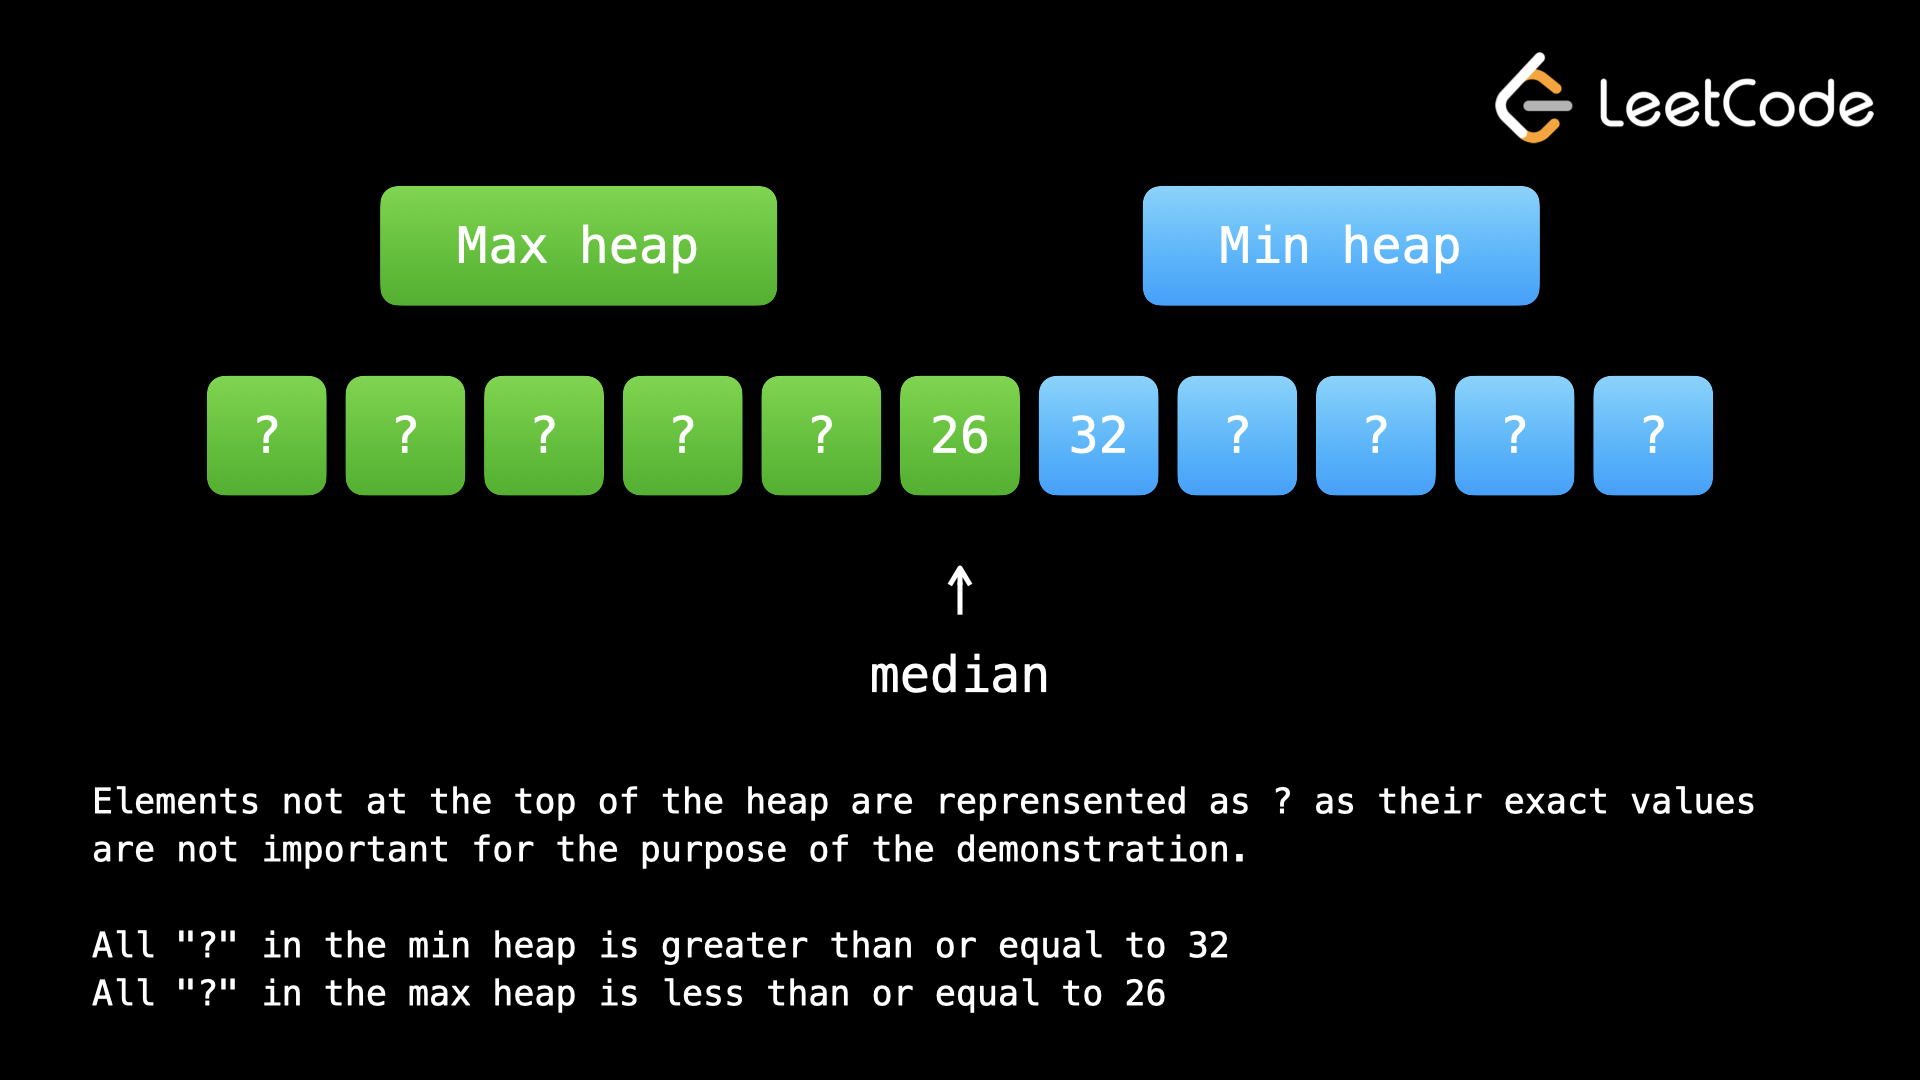

When we add to the heap, we need to make sure that the difference between the heap's sizes stays the same (or within 1 if there's an odd number of elements). We also need to make sure that all the elements in the min heap are larger than or equal to all the elements in the max heap (otherwise the coloring analogy would be broken). To accomplish this, we can use the following algorithm:

Push num onto the max heap (as mentioned above we arbitrarily chose the max heap).
Pop from the max heap, and push that element onto the min heap.
After step 2, if the min heap has more elements than the max heap, pop from the min heap and push the result onto the max heap.
Again, let's imagine the dataset as an array split in half with different colors. When we pop from one heap and push the result to the other one, that's like sliding the point where the colors change over by one element.

The 3rd step is how we maintain the decision we made to have the max heap store the extra element if there are an odd number of elements.

    The 2nd step is how we maintain the property in bold font. Imagine if we had a data set 1, 3, 7, 13, 36, 100, and we wanted to add 50. We initially add it to the max heap in step 1, which makes the max heap 50, 7, 3, 1. Notice that it does not belong in the max heap because the 13 and 36 in the min heap are less. By popping from the max heap then pushing to the min heap, we maintain the property.

    Because we (arbitrarily) chose the max heap to be the heap that has more elements when the total number of elements is odd, we end up pushing the 13 off at the end and putting it on the max heap. After all operations, the max heap is 13, 7, 3, 1, and the median 13 is correctly positioned.

<video controls src="20240212-1759-15.9653527.mp4" title="Title"></video>

In [50]:
import heapq

class MedianFinder:
    def __init__(self):
        self.min_heap = []
        self.max_heap = []

    def addNum(self, num: int) -> None:
        heapq.heappush(self.max_heap, -num)
        heapq.heappush(self.min_heap, -heapq.heappop(self.max_heap))
        if len(self.min_heap) > len(self.max_heap):
            heapq.heappush(self.max_heap, -heapq.heappop(self.min_heap))

    def findMedian(self) -> float:
        if len(self.max_heap) > len(self.min_heap):
            return -self.max_heap[0]
        return (self.min_heap[0] - self.max_heap[0]) / 2

This algorithm allows us to have an O(1) time complexity for findMedian and an O(logn) time complexity for addNum, which makes it an incredibly fast algorithm, where n is the number of times addNum has been called so far. The space complexity is O(n) to store the heaps.

Heaps are similar to hash maps and unlike trees/graphs or linked lists, in that normally when a heap is used, the problem isn't solely focused on the heap. A heap is usually just a tool to accomplish something in an algorithm efficiently. In the next chapter (greedy), we'll talk more about heaps and how they can help us implement efficient algorithms. Before that, we'll talk about a common pattern that uses heaps in the next article. In the meantime, try solving these practice problems.

**Top k**

One common type of interview problem is one that asks you to find the k best elements, with "best" being defined by the problem. The easiest way to solve these problems is to just sort the input according to the criteria defined in the problem, and then return the top k elements. This has a time complexity of O(n⋅logn) if n is the length of the input.

Using a heap, we can instead find the top k elements in O(n⋅logk). Logically, k < n, so this is an improvement. Practically, because 
log
⁡
log is so fast anyway, it probably isn't a big deal in terms of a speed increase. But when interviewers give you these kinds of problems, it is these small improvements that they are looking for.

What is the improvement? Create a max heap at the start, iterate over the input while pushing every element on the heap (according to the problem's criteria), and pop from the heap once the size exceeds k. Because the heap's size is bounded by k, then all heap operations are at worst O(logk). Multiply this by n iterations to get O(n⋅logk). Because we are using a max heap and we are popping from the heap according to the problem criteria, pops remove the "worst" elements, so at the end, the k "best" elements will remain in the heap.

Let's look at some examples.

Example 1: 347. Top K Frequent Elements

Given an integer array nums and an integer k, return the k most frequent elements. It is guaranteed that the answer is unique.

In [62]:
from collections import defaultdict
def topKFrequent(nums, k):
    f= defaultdict(int)
    ans = []
    for num in nums:
        f[num] += 1
    fs = dict(sorted(f.items(), key=lambda item:item[1],reverse=True))
    i = 0
    for key in fs.keys():
        if k > 0:
            ans.append(key)
            k -= 1

    return ans
nums = [4,1,-1,2,-1,2,3]
topKFrequent(nums, 2)


[-1, 2]

In [65]:
def topKFrequent2(nums, k):
    f= defaultdict(int)
    for num in nums:
        f[num] += 1
    heap = [(-v,key) for key, v in f.items()]
    heapq.heapify(heap)
    ans = [heapq.heappop(heap)[1] for i in range(k)]
    return ans
nums = [4,1,-1,2,-1,2,3]
topKFrequent2(nums, 2)

[-1, 2]

Example 2: 658. Find K Closest Elements

Given a sorted integer array arr, two integers k and x, return the k closest integers to x. The answer should also be sorted in ascending order. If there are ties, take the smaller elements.

In [85]:
def findClosestElements(arr, k, x):
    heap = []
    for num in arr:
        distance = abs(num - x)
        heapq.heappush(heap, (-distance, -num))
        if len(heap) > k:
            heapq.heappop(heap)
    ans = [-heapq.heappop(heap)[1] for i in range(k)]
    return sorted(ans)
arr = [1,2,3,4,5]
findClosestElements(arr, 4, 3)

[1, 2, 3, 4]